<a href="https://colab.research.google.com/github/rodrigoromanguzman/Actividades_Aprendizaje-/blob/main/MNA_IAyAA_semana_7_Actividad_rrom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**


*   Adrián Alejandro Dávila González - A01039334
*   Juan Antonio Melendres Villa - A00369017
*   Andrea Margarita Osorio González - A01104776
*   Rodrigo Ildefonso Román Guzmán - A01794225
*   Jeanette Ríos Martínez - A01688888

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import io
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         

from sklearn.model_selection import learning_curve, validation_curve

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.utils import check_array

from sklearn import tree
import pydotplus 
from IPython.display import Image


#**Ejercicio-1.** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Lectura del archivo para crear el dataframe
url = 'https://drive.google.com/file/d/1ljfjeqdrceLt69y24iof3qyjB2KB4J61/view?usp=sharing'
path='https://drive.google.com/uc?id=' + url.split('/')[-2]
response = requests.get(path)
contents = response.text
lineas = contents.split('\n')

data = pd.read_csv(io.StringIO('\n'.join(lineas)), sep=';', header=0)
# Obtener el número de columnas y registros
num_columnas = data.shape[1]
num_registros = data.shape[0]

# Imprimir el número de columnas y registros
print("Número de columnas:", num_columnas)
print("Número de registros:", num_registros)
data.head()

Número de columnas: 19
Número de registros: 500


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
# Crear una instancia de LabelEncoder
le= LabelEncoder()
# Transformar los valores de la columna 'Type' en valores numéricos (Link:0, Photo:1, Status:2, Video:3)
data["Type"]=le.fit_transform(data["Type"])
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
#Hacemos un nuevo dataframe para trabajar, lo llamamos como el profesor "my data"
mydata= data[['Page total likes', 'Type', 'Category', 'Post Month', 'Post Hour', 'Post Weekday', 'Paid', 'Lifetime People who have liked your Page and engaged with your post']]
# Seleccionamos cuales seran variables de entrada y variable de salida
X= mydata[['Page total likes', 'Type', 'Category', 'Post Month', 'Post Hour', 'Post Weekday', 'Paid']]
Ys = mydata[['Lifetime People who have liked your Page and engaged with your post']]


In [ ]:
Y=Ys.rename(columns={"Lifetime People who have liked your Page and engaged with your post":"LPE", }, inplace=False).astype(np.float64)
Y.info()
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LPE     500 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


#**Ejercicio-2.**

In [ ]:
# Dividir los datos en conjunto de prueba y entrenamiento/validación
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=100, shuffle=True)
# Mostrar la forma de los conjuntos de datos resultantes
print("Datos de entrenamiento/validación - X:", X_train_val.shape)
print("Datos de entrenamiento/validación - Y:", y_train_val.shape)
print("Datos de prueba - X:", X_test.shape)
print("Datos de prueba - Y:", y_test.shape)

Datos de entrenamiento/validación - X: (400, 7)
Datos de entrenamiento/validación - Y: (400, 1)
Datos de prueba - X: (100, 7)
Datos de prueba - Y: (100, 1)


In [ ]:
#Se proporciona información sobre los tipos de datos y la división del conjunto de entrenamiento.
X_train_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 490 to 215
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page total likes  400 non-null    int64  
 1   Type              400 non-null    int64  
 2   Category          400 non-null    int64  
 3   Post Month        400 non-null    int64  
 4   Post Hour         400 non-null    int64  
 5   Post Weekday      400 non-null    int64  
 6   Paid              399 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 25.0 KB


#**Ejercicio-3.**

In [ ]:
def calcular_rmse(y_true, y_pred):
    """
    Calcula la raíz cuadrada del error cuadrático medio (RMSE).

    Parámetros:
    - y_true: Valores reales o verdaderos.
    - y_pred: Valores predichos.

    Retorna:
    - RMSE: Raíz cuadrada del error cuadrático medio.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

def calcular_mae(y_true, y_pred):
    """
    Calcula el error absoluto medio (MAE).

    Parámetros:
    - y_true: Valores reales o verdaderos.
    - y_pred: Valores predichos.

    Retorna:
    - MAE: Error absoluto medio.
    """
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

def calcular_mape(y_true, y_pred):
    """
    Calcula el error porcentual absoluto medio (MAPE).

    Parámetros:
    - y_true: Valores reales o verdaderos.
    - y_pred: Valores predichos.

    Retorna:
    - MAPE: Error porcentual absoluto medio.
    """
    #Agregamos como sugerio el profesor un valor epsilon para evitar divisiones entre cero
    epsilon= np.finfo(float).eps
    mape = np.mean(np.abs((y_true - y_pred) / y_true+epsilon)) * 100
    return mape

    


#**Ejercicio-4.**

<Axes: >

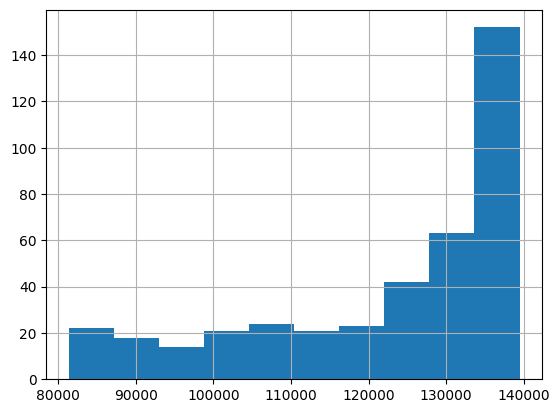

In [ ]:
X_train_val["Page total likes"].hist()

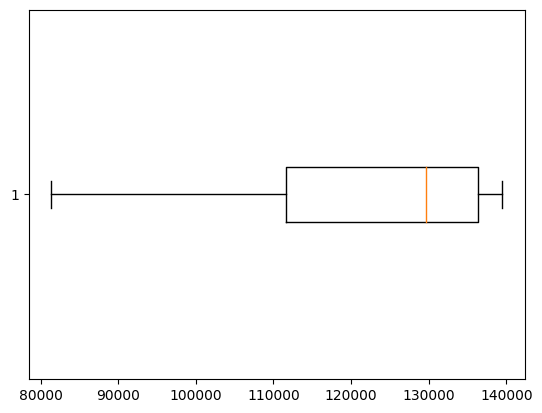

In [ ]:
plt.boxplot(X_train_val['Page total likes'], vert=False);

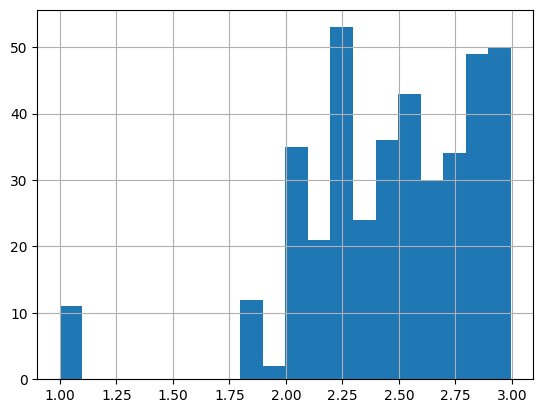

In [ ]:
#Lo dejaremos como esta porque estan muy similares
maximo= X_train_val['Page total likes'].max()
np.power(maximo + 1 - X_train_val['Page total likes'], 0.1).hist(bins=20);

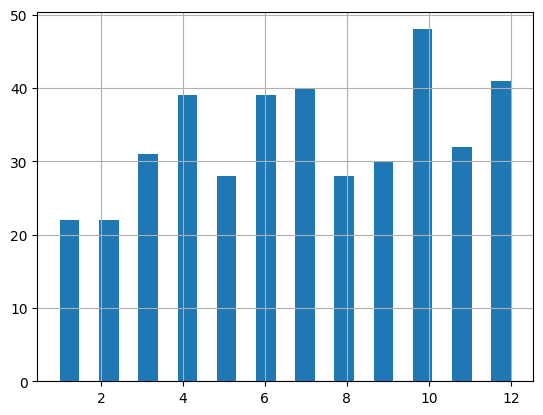

In [ ]:
#Lo dejaremos como esta porque las entradas no son tantas, seguimos considerandolos como numericos por ahora ya que son los meses y parece estable
X_train_val['Post Month'].hist(bins=23);

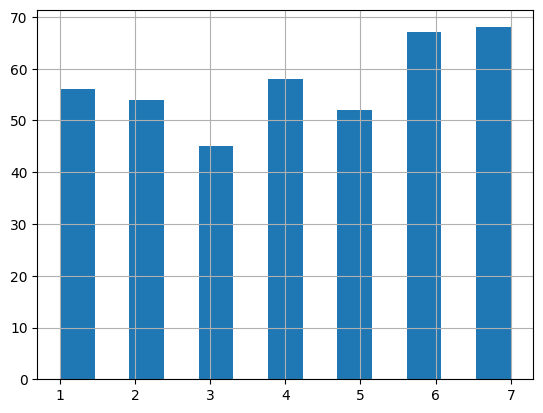

In [ ]:
#Lo dejaremos como esta porque su distribucion se ve uniforme, excepto en el del fin de semana
X_train_val['Post Weekday'].hist(bins=13);

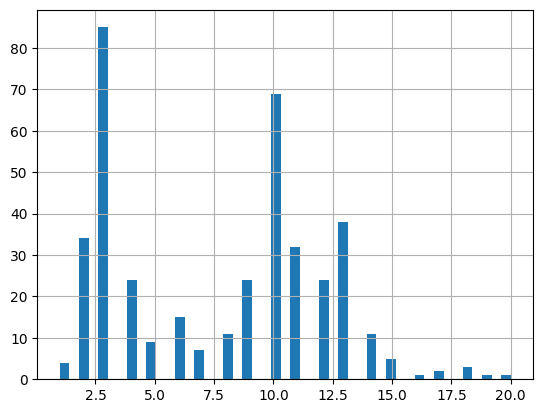

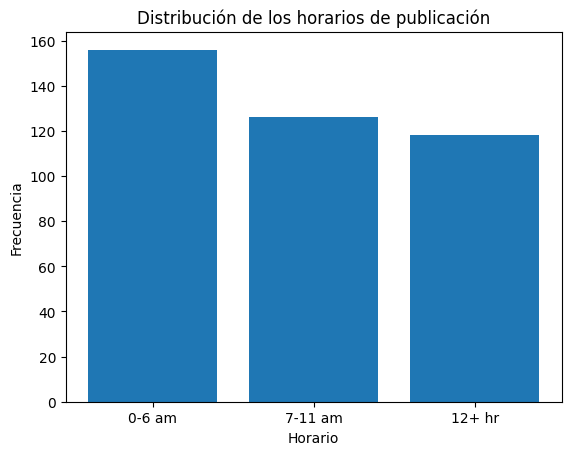

In [ ]:
#Se adecuo para discretizarla y separarla por horarios 0 a 6am, 7 a 11 am y arriba de las 12 hrs
X_train_val['Post Hour'].hist(bins=47);
# Definir los límites de los intervalos
intervalos = [-1, 6, 11, 23]

# Definir las etiquetas de las categorías
etiquetas = ['0-6 am', '7-11 am', '12+ hr']

# Discretizar la columna 'Post Hour'
X_train_val['Post Hour Discretizado'] = pd.cut(X_train_val['Post Hour'], bins=intervalos, labels=etiquetas, right=False)

# Contar los valores en cada categoría
conteo_categorias = X_train_val['Post Hour Discretizado'].value_counts()

# Ordenar las categorías por etiqueta
conteo_categorias = conteo_categorias.sort_index()

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar el histograma de las categorías
ax.bar(conteo_categorias.index, conteo_categorias.values)

# Configurar los títulos y etiquetas
ax.set_title('Distribución de los horarios de publicación')
ax.set_xlabel('Horario')
ax.set_ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()


In [ ]:
print(X_train_val.head())

     Page total likes  Type  Category  Post Month  Post Hour  Post Weekday  \
490             85979     1         3           1         11             6   
83             137177     1         3          11         10             5   
90             137059     1         1          11          3             2   
403            107907     0         1           4          6             2   
470             91437     0         1           2         13             3   

     Paid Post Hour Discretizado  
490   0.0                 12+ hr  
83    1.0                7-11 am  
90    0.0                 0-6 am  
403   0.0                7-11 am  
470   0.0                 12+ hr  


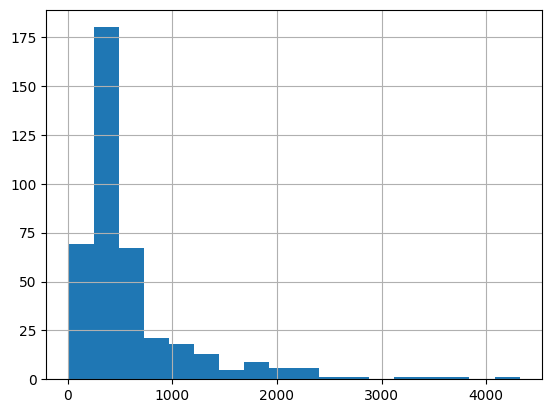

In [ ]:
y_train_val['LPE'].hist(bins=18);


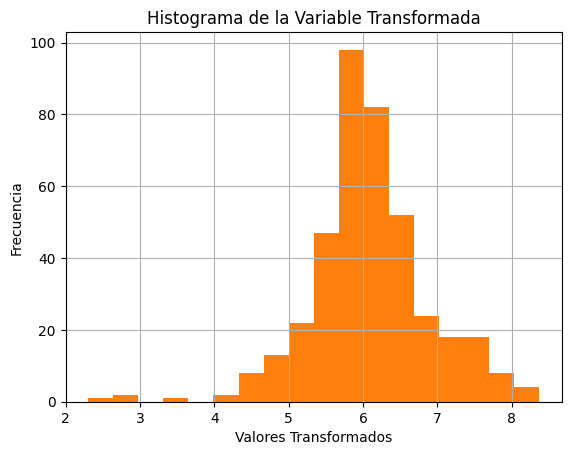

In [ ]:
# Aplicar transformación logarítmica
y_train_val_transformada = np.log1p(y_train_val['LPE'])

# Graficar el histograma de la variable transformada
y_train_val_transformada.hist(bins=18)
# Graficar el histograma de la variable transformada
plt.hist(y_train_val_transformada, bins=18)
plt.xlabel('Valores Transformados')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Variable Transformada')
plt.show()

Valores categoricas

In [ ]:
X_train_val['Category'].value_counts()

1    174
3    117
2    109
Name: Category, dtype: int64

In [ ]:
#Se puede observar que si tiene al menos un 5%
X_train_val['Category'].value_counts()/X_train_val.shape[0]

1    0.4350
3    0.2925
2    0.2725
Name: Category, dtype: float64

In [ ]:
X_train_val['Paid'].value_counts()

0.0    280
1.0    119
Name: Paid, dtype: int64

In [ ]:
X_train_val['Paid'].value_counts()/X_train_val.shape[0]

0.0    0.7000
1.0    0.2975
Name: Paid, dtype: float64

In [ ]:
X_train_val['Type'].value_counts()

1    339
2     37
0     18
3      6
Name: Type, dtype: int64

In [ ]:
#Si require ajustar para que cumplan al menos un 5% por nivel, por lo que 0 y 3 se juntaran 
X_train_val['Type'].value_counts()/X_train_val.shape[0]

1    0.8475
2    0.0925
0    0.0450
3    0.0150
Name: Type, dtype: float64

In [ ]:
#Definimos nuestras funciones para transformar los datos

In [ ]:
def my_power(x):
  M = np.max(x)
  temp = np.power(M+1-x,0.1)
  return temp
def my_log(y):
  temp = np.log(1+y)
  return temp
def mi_invlog(y):
  temp = np.exp(y)-1
  return temp
def my_type(x):
  x['Type'] = x['Type'].map({1:1,2:2,0:4,3:4})
  return x


Piplelines para las variables de entrada:

In [ ]:
# Datos perdidos de variables numéricas:
numImp_pipe = Pipeline(steps=[('numImp', SimpleImputer(strategy="median"))])
numImp_pipe_nombres = ['Page total likes', 'Post Month', 'Post Weekday', 'Post Hour']

# Transformación del factor numérico de entrada "Page total likes":
numPow_pipe = Pipeline(steps=[("numPow", FunctionTransformer(lambda x: np.log1p(x)))])
numPow_pipe_nombres = ['Page total likes']


# Datos perdidos de variables categóricas:
catImp_pipe = Pipeline(steps=[('catImp', SimpleImputer(strategy="most_frequent"))])
catImp_pipe_nombres = ['Category', 'Paid', 'Type']

# Transformacion del factor categorico de entrada Type:
catMap_pipe = Pipeline(steps=[('catImp', FunctionTransformer(my_type))])
catMap_pipe_nombres = ['Type']


# Transformaciones One-Hot_Encoding:
catOhe_pipe = Pipeline(steps=[('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"))])
catOhe_pipe_nombres = ['Category', 'Paid', 'Type']



# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers=[
    ('numimp', numImp_pipe, numImp_pipe_nombres),
    ('numpow', numPow_pipe, numPow_pipe_nombres),
    ('catimp', catImp_pipe, catImp_pipe_nombres),
    ('catMap', catMap_pipe, catMap_pipe_nombres),
    ('catohe', catOhe_pipe, catOhe_pipe_nombres)
])


#**Ejercicio-5.**

In [ ]:
# Partición de los datos en 100 para validación y 300 para entrenamiento
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=300, test_size=100, shuffle=True)

print("Shape de X_train:", X_train.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de X_val:", X_val.shape)


Shape de X_train: (300, 8)
Shape de y_train: (300, 1)
Shape de X_val: (100, 8)


In [ ]:
# Crear y ajustar el modelo DummyRegressor utilizando la estrategia 'mean':
model = DummyRegressor(strategy='mean')
model.fit(X_train, y_train)


DummyRegressor()

In [ ]:
# Realizar las predicciones en los conjuntos de entrenamiento y validación
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)



In [ ]:
# Calcular los errores RMSE, MAE y MAPE en los conjuntos de entrenamiento y validación
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100
mape_val = mean_absolute_percentage_error(y_val, y_val_pred) * 100

# Imprimir los errores
print("RMSE en entrenamiento:", rmse_train)
print("RMSE en validación:", rmse_val)
print("MAE en entrenamiento:", mae_train)
print("MAE en validación:", mae_val)
print("MAPE en entrenamiento:", mape_train)
print("MAPE en validación:", mape_val)

RMSE en entrenamiento: 604.1895570376348
RMSE en validación: 464.3374791032919
MAE en entrenamiento: 391.96799999999996
MAE en validación: 341.355
MAPE en entrenamiento: 152.08980898936852
MAPE en validación: 92.14971832941237


#**Ejercicio-6.**

In [ ]:
None

#**Ejercicio-7.**

In [ ]:
None

#**Ejercicio-8.**

In [ ]:
None

#**Ejercicio-9.**

In [ ]:
None

#**Ejercicio-10.**

In [ ]:
None

#**Ejercicio-11.**

In [ ]:
None

#**Ejercicio-12.**

In [ ]:
None

###**Fin de la Actividad de la semana 7.**